In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and processing

In [2]:
ld = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
ld.shape

(614, 13)

In [4]:
ld.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
ld = ld.dropna()

In [7]:
# Label encoding
ld.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

C:\Users\suyun\AppData\Local\Temp\ipykernel_21516\92221233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ld.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)


In [8]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
ld['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
ld = ld.replace(to_replace='3+', value=4)

In [11]:
ld['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

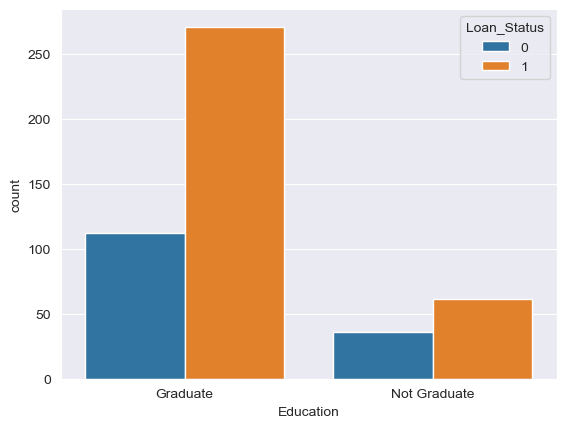

In [12]:
# Correlation between Education and Loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=ld)

plt.show()

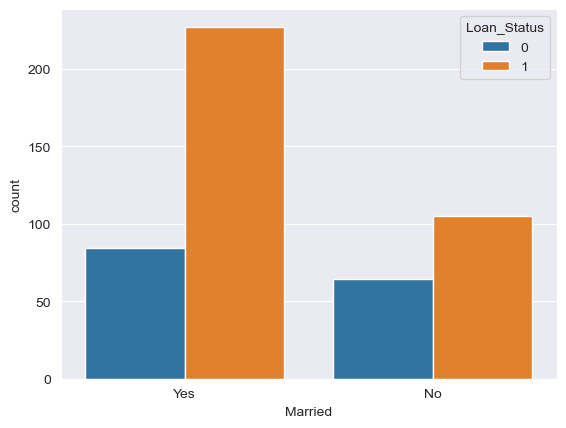

In [13]:
# Correlation between Marital_Status and Loan_Status
sns.countplot(x='Married', hue='Loan_Status', data=ld)
plt.show()

In [14]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
ld.replace({'Married': {'Yes':1, 'No':0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

C:\Users\suyun\AppData\Local\Temp\ipykernel_21516\1399129560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ld.replace({'Married': {'Yes':1, 'No':0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)


In [16]:
ld

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
# Malumotlarni ajratish va labellash

x_data = ld.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y_labels = ld['Loan_Status']

In [18]:
print(x_data)
print(y_labels)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size = 0.1, random_state=2)

In [20]:
print(x_data.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


Training the Model

Support Vector Machine

In [21]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear')

In [22]:
# Support Vector Machine modelini train qilamiz.

classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [23]:
# Train data ning accuracy score natijasini koramiz

from sklearn.metrics import accuracy_score

x_train_prediction = classifier.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)

In [24]:
print("Accuracy data score:", training_accuracy)

Accuracy data score: 0.7962962962962963


In [25]:
# Test data ning accuracy score natijasini koramiz

x_test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction, y_test)


In [26]:
print("Accuracy data score:", test_accuracy)

Accuracy data score: 0.8125


In [31]:
pd.DataFrame({'Actual': y_test, 'Predicted': x_test_prediction})

,Actual,Predicted
536,1,1
358,0,0
474,1,1
282,1,1
545,1,1
209,0,1
220,0,0
388,1,1
560,1,1
299,0,1


In [29]:
x_test_prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)